In [22]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.1



Hidden Layer      CPU     GPU
     1            4.48    3.51
     5            14.4    4.75

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape


(60000, 28, 28)

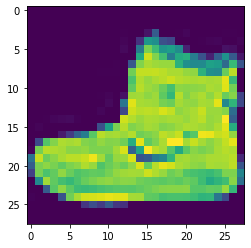

In [5]:
plt.imshow(train_images[0])


In [6]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [7]:
28*28

784

In [24]:
def get_model(hidden_layers=1):
    layers = []
    # Your code goes here-----------START
    layers.append(keras.layers.Flatten(input_shape=(28,28)))

    for i in range(hidden_layers):
            layers.append(keras.layers.Dense(500,activation='relu'))

    layers.append(keras.layers.Dense(10,activation='sigmoid'))
    # Create Flatten input layers
    # Create hidden layers that are equal to hidden_layers argument in this function
    # Create output 
    # Your code goes here-----------END
    model = keras.Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [25]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4779 - accuracy: 0.8300
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3604 - accuracy: 0.8687
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3235 - accuracy: 0.8804
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2966 - accuracy: 0.8908
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2803 - accuracy: 0.8963


In [26]:
model.predict(test_images_scaled)[2]


313/313 [==============================] - 0s 741us/step


array([1.2691890e-01, 9.9999034e-01, 3.4121324e-05, 1.4261402e-01,
       2.2274971e-03, 3.1640060e-10, 3.6651986e-03, 1.0275207e-12,
       7.6267905e-05, 7.5955811e-08], dtype=float32)

In [17]:
test_labels[2]


1

In [12]:
tf.config.experimental.list_physical_devices() 


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [31]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model(1)
    cpu_model.fit(test_images_scaled, test_labels, epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 0.6822 - accuracy: 0.7631
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4987 - accuracy: 0.8233
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4479 - accuracy: 0.8359
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4143 - accuracy: 0.8483
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3761 - accuracy: 0.8632
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3525 - accuracy: 0.8693
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3332 - accuracy: 0.8768
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3114 - accuracy: 0.8839
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3016 - accuracy: 0.8866
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2811 - accuracy: 0.8955

In [32]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model(1)
    gpu_model.fit(test_images_scaled, test_labels, epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 0.6784 - accuracy: 0.7605
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4959 - accuracy: 0.8266
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4404 - accuracy: 0.8441
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4182 - accuracy: 0.8477
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3767 - accuracy: 0.8635
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3481 - accuracy: 0.8743
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.8776
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3159 - accuracy: 0.8824
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2930 - accuracy: 0.8906
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2727 - accuracy: 0.8990

In [33]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model(5)
    cpu_model.fit(test_images_scaled, test_labels, epochs=10)

Epoch 1/10
313/313 [==============================] - 2s 6ms/step - loss: 0.7364 - accuracy: 0.7232
Epoch 2/10
313/313 [==============================] - 2s 5ms/step - loss: 0.5366 - accuracy: 0.8084
Epoch 3/10
313/313 [==============================] - 2s 5ms/step - loss: 0.4924 - accuracy: 0.8230
Epoch 4/10
313/313 [==============================] - 2s 5ms/step - loss: 0.4501 - accuracy: 0.8394
Epoch 5/10
313/313 [==============================] - 2s 5ms/step - loss: 0.4239 - accuracy: 0.8467
Epoch 6/10
313/313 [==============================] - 2s 5ms/step - loss: 0.3917 - accuracy: 0.8564
Epoch 7/10
313/313 [==============================] - 2s 5ms/step - loss: 0.3678 - accuracy: 0.8658
Epoch 8/10
313/313 [==============================] - 2s 5ms/step - loss: 0.3736 - accuracy: 0.8651
Epoch 9/10
313/313 [==============================] - 2s 5ms/step - loss: 0.3499 - accuracy: 0.8740
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.3343 - accuracy: 0.8759

In [34]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model(5)
    gpu_model.fit(test_images_scaled, test_labels, epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 0.7370 - accuracy: 0.7278
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5465 - accuracy: 0.8033
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5042 - accuracy: 0.8185
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4444 - accuracy: 0.8374
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4261 - accuracy: 0.8493
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3917 - accuracy: 0.8572
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3792 - accuracy: 0.8633
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3588 - accuracy: 0.8720
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3435 - accuracy: 0.8724
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3201 - accuracy: 0.8804